# Assignment 7
### Do any five.

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

Estimated expected total: 4.200


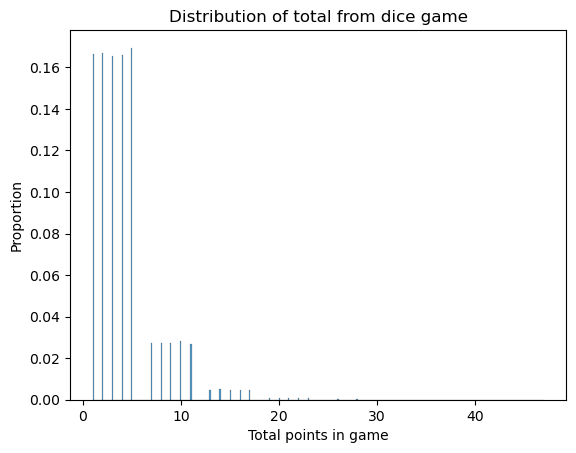

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# use a fresh RNG with a different seed
rng = np.random.default_rng(42)

def play_game(rng):
    total = 0
    while True:
        roll = rng.integers(1, 7)  # 1 through 6
        total += roll
        if roll != 6:              # stop if not 6
            break
    return total

# run many simulations
n_sims = 100_000
totals = [play_game(rng) for _ in range(n_sims)]

# approximate expected value
print(f"Estimated expected total: {np.mean(totals):.3f}")

# visualize the distribution
sns.histplot(totals, stat="proportion")
plt.xlabel("Total points in game")
plt.ylabel("Proportion")
plt.title("Distribution of total from dice game")
plt.show()


## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

In [19]:
rng = np.random.default_rng(123)

def g(x):
    return np.sqrt(x)

# sample from Uniform(0,1)
n = 20_000
x_samples = rng.uniform(low=0.0, high=1.0, size=n)

# Monte Carlo approximation of E[g(X)]
Eg_hat = np.mean(g(x_samples))

# g(E[X])
Ex_hat = np.mean(x_samples)
g_of_Ex = g(Ex_hat)

print(f"Estimated E[sqrt(X)]: {Eg_hat:.5f}")
print(f"sqrt(E[X]):          {g_of_Ex:.5f}")

Estimated E[sqrt(X)]: 0.66534
sqrt(E[X]):          0.70535


## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

Radio Therapy
YES    886
NO     457
Name: count, dtype: int64
MLE for P(Radio Therapy = YES): 0.6597


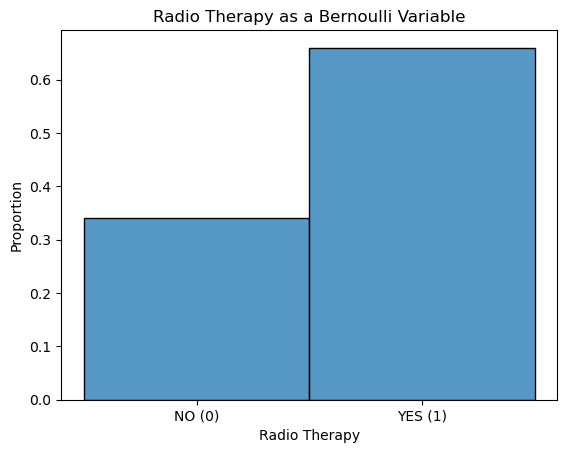

Bootstrap mean of p_hat: 0.6594
Bootstrap sd of p_hat:   0.0131


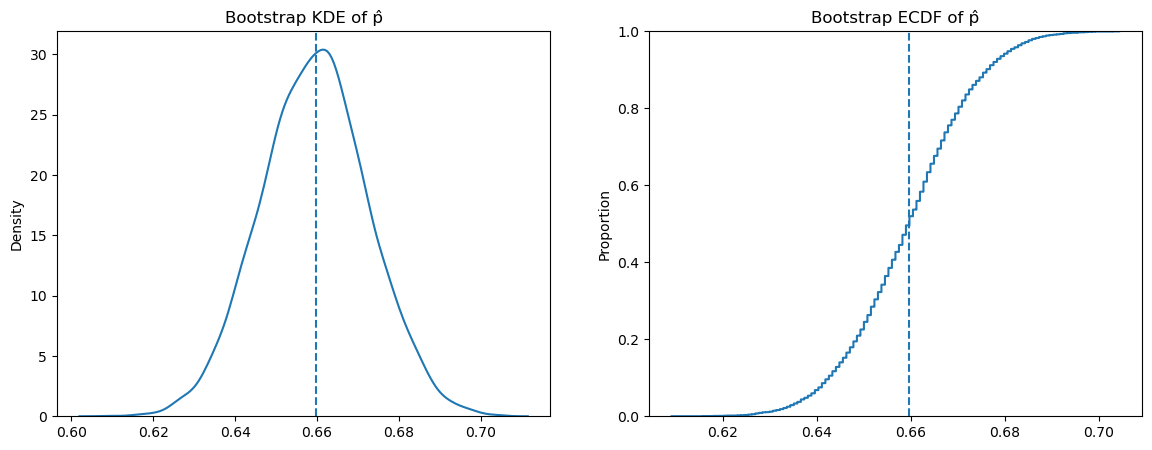

In [20]:

# load data
metabric = pd.read_csv("/Users/VIDAL2/Desktop/1Masters/DS5030/assignments/assignment6ds5030/metabric.csv")

# look at the raw categories
print(metabric["Radio Therapy"].value_counts(dropna=False))

# map YES -> 1, NO -> 0, drop missing
rt = metabric["Radio Therapy"].map({"YES": 1, "NO": 0})
rt = rt.dropna()

# MLE for Bernoulli parameter (probability of YES) is the sample mean
p_hat = rt.mean()
print(f"MLE for P(Radio Therapy = YES): {p_hat:.4f}")

# simple bar plot of the Bernoulli outcomes
sns.histplot(rt, stat="proportion", discrete=True)
plt.xticks([0, 1], ["NO (0)", "YES (1)"])
plt.ylabel("Proportion")
plt.title("Radio Therapy as a Bernoulli Variable")
plt.show()

# Bootstrap sampling distribution of the mean
B = 5000
n = len(rt)

rng = np.random.default_rng(7)
boot_means = []

for _ in range(B):
    # sample indices with replacement
    idx = rng.integers(0, n, size=n)
    sample_rt = rt.iloc[idx]
    boot_means.append(sample_rt.mean())

boot_means = np.array(boot_means)

print(f"Bootstrap mean of p_hat: {boot_means.mean():.4f}")
print(f"Bootstrap sd of p_hat:   {boot_means.std(ddof=1):.4f}")

# plot KDE & ECDF of bootstrap means
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.kdeplot(x=boot_means, ax=axes[0])
axes[0].axvline(p_hat, linestyle="--")
axes[0].set_title("Bootstrap KDE of p̂")

sns.ecdfplot(x=boot_means, ax=axes[1])
axes[1].axvline(p_hat, linestyle="--")
axes[1].set_title("Bootstrap ECDF of p̂")

plt.show()


## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

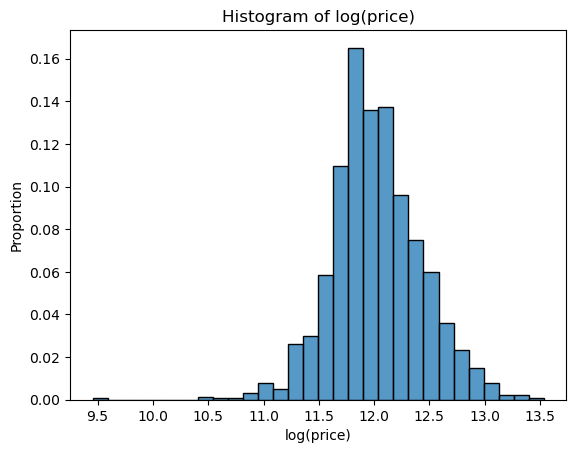

mu_hat  (log-price mean):   12.0210
sigma_hat (log-price sd):   0.4075


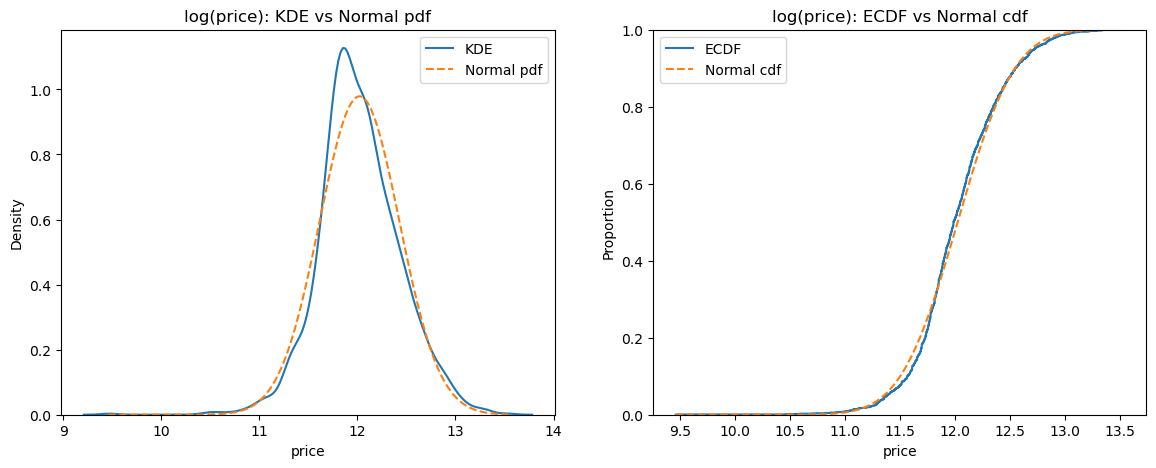

In [21]:
# load Ames price data
ames = pd.read_csv("/Users/VIDAL2/Desktop/1Masters/DS5030/assignments/assignment4ds5030/data/ames_prices.csv")

# log-transform price to stabilize variance / make more normal
log_price = np.log(ames["price"])

# quick histogram
sns.histplot(log_price, stat="proportion", bins=30)
plt.xlabel("log(price)")
plt.title("Histogram of log(price)")
plt.show()

# MLEs for Normal(mu, sigma^2):
mu_hat = log_price.mean()               # sample mean
sigma_hat = log_price.std(ddof=0)       # population sd (MLE style)

print(f"mu_hat  (log-price mean):   {mu_hat:.4f}")
print(f"sigma_hat (log-price sd):   {sigma_hat:.4f}")

# grid for pdf/cdf
grid = np.linspace(log_price.min(), log_price.max(), 200)

pdf_model = stats.norm.pdf(grid, loc=mu_hat, scale=sigma_hat)
cdf_model = stats.norm.cdf(grid, loc=mu_hat, scale=sigma_hat)

# KDE vs pdf
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.kdeplot(x=log_price, ax=axes[0], label="KDE")
axes[0].plot(grid, pdf_model, linestyle="--", label="Normal pdf")
axes[0].set_title("log(price): KDE vs Normal pdf")
axes[0].legend()

# ECDF vs cdf
sns.ecdfplot(x=log_price, ax=axes[1], label="ECDF")
axes[1].plot(grid, cdf_model, linestyle="--", label="Normal cdf")
axes[1].set_title("log(price): ECDF vs Normal cdf")
axes[1].legend()

plt.show()

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

Bootstrap mean of mu_hat:    12.0209
Bootstrap sd of mu_hat:      0.0075
Bootstrap mean of sigma_hat: 0.4073
Bootstrap sd of sigma_hat:   0.0071


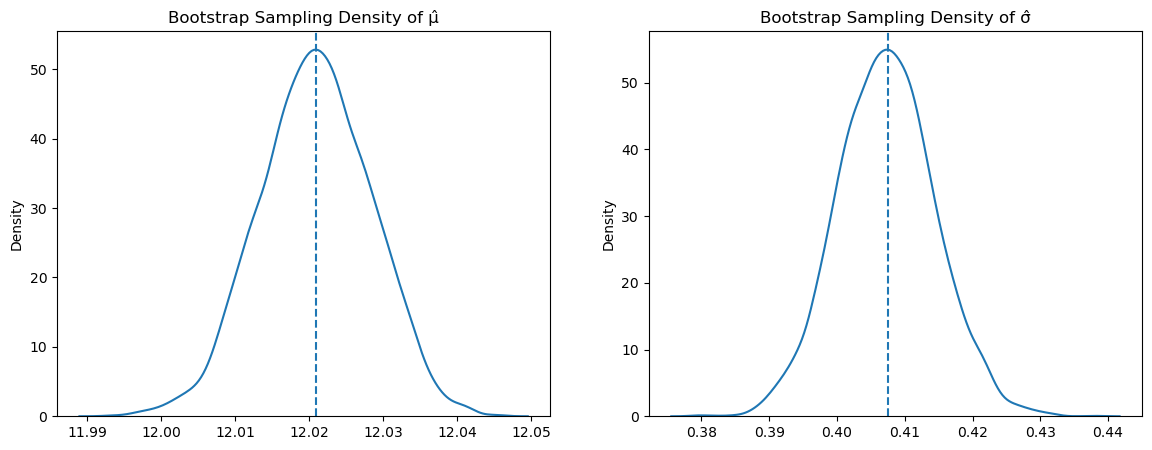

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# assume log_price from the previous cell is defined
y = log_price.dropna()
n = len(y)

rng = np.random.default_rng(99)

def normal_mle(sample):
    """Return (mu_hat, sigma_hat) for Normal MLE."""
    mu_hat = sample.mean()
    sigma_hat = sample.std(ddof=0)   # MLE for sigma
    return mu_hat, sigma_hat

B = 5000  # number of bootstrap samples
mu_boot = []
sigma_boot = []

for _ in range(B):
    # sample with replacement from indices
    idx = rng.integers(0, n, size=n)
    y_boot = y.iloc[idx]
    mu_hat_b, sigma_hat_b = normal_mle(y_boot)
    mu_boot.append(mu_hat_b)
    sigma_boot.append(sigma_hat_b)

mu_boot = np.array(mu_boot)
sigma_boot = np.array(sigma_boot)

print(f"Bootstrap mean of mu_hat:    {mu_boot.mean():.4f}")
print(f"Bootstrap sd of mu_hat:      {mu_boot.std(ddof=1):.4f}")
print(f"Bootstrap mean of sigma_hat: {sigma_boot.mean():.4f}")
print(f"Bootstrap sd of sigma_hat:   {sigma_boot.std(ddof=1):.4f}")

# plot sampling distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.kdeplot(x=mu_boot, ax=axes[0])
axes[0].axvline(mu_hat, linestyle="--")  # original estimate from previous cell
axes[0].set_title("Bootstrap Sampling Density of μ̂")

sns.kdeplot(x=sigma_boot, ax=axes[1])
axes[1].axvline(sigma_hat, linestyle="--")
axes[1].set_title("Bootstrap Sampling Density of σ̂")

plt.show()
